1. INSTALLING NECESSARY LIBRARIES

In [110]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


2. IMPORTING NECESSARY LIBRARIES

2.1 For Data Manipulation

In [111]:
import pandas as pd
import numpy as np

2.2 For Visualization

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

2.3 For Machine Learning

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

2.4 For model saving 

In [114]:
import joblib

3. LOADING DATASETS

In [115]:
treatment_df = pd.read_csv('C:\\Users\\DELL\\Downloads\\art_coverage_by_country_clean.csv', sep=',')
art_df = pd.read_csv('C:\\Users\\DELL\\Downloads\\treatment.csv', sep=';')

4 DATA TRANSFORMATION & CLEANING

4.1 Standardizing the country column name to 'Country' for merging

In [116]:
treatment_df.rename(columns={'country': 'Country'}, inplace=True)

4.2 Checking for Actual Column names

In [117]:
print("📌 Columns in treatment_df:", treatment_df.columns.tolist())
print("📌 Columns in art_df:", art_df.columns.tolist())

📌 Columns in treatment_df: ['Country', 'Reported number of people receiving ART', 'Estimated number of people living with HIV', 'Estimated ART coverage among people living with HIV (%)', 'Estimated number of people living with HIV_median', 'Estimated number of people living with HIV_min', 'Estimated number of people living with HIV_max', 'Estimated ART coverage among people living with HIV (%)_median', 'Estimated ART coverage among people living with HIV (%)_min', 'Estimated ART coverage among people living with HIV (%)_max', 'WHO Region']
📌 Columns in art_df: ['country', 'iso2', 'iso3', 'iso_numeric', 'g_whoregion', 'year', 'rep_meth', 'new_sp_coh', 'new_sp_cur', 'new_sp_cmplt', 'new_sp_died', 'new_sp_fail', 'new_sp_def', 'c_new_sp_tsr', 'new_snep_coh', 'new_snep_cmplt', 'new_snep_died', 'new_snep_fail', 'new_snep_def', 'c_new_snep_tsr', 'ret_coh', 'ret_cur', 'ret_cmplt', 'ret_died', 'ret_fail', 'ret_def', 'hiv_new_sp_coh', 'hiv_new_sp_cur', 'hiv_new_sp_cmplt', 'hiv_new_sp_died', 'hiv

4.3 Stripping white space from column names

In [118]:
treatment_df.columns = treatment_df.columns.str.strip()
art_df.columns = art_df.columns.str.strip()

4.4 Standardizing country column names

In [119]:
if 'country' in art_df.columns:
    art_df.rename(columns={'country': 'Country'}, inplace=True)

4.5 Merge On 'Country'

In [120]:
df = pd.merge(treatment_df, art_df, on='Country', how='inner')

4.6 Showing Results

In [121]:
print("✅ Merged dataset shape:", df.shape)
print(df[['Country']].head())

✅ Merged dataset shape: (4058, 83)
       Country
0  Afghanistan
1  Afghanistan
2  Afghanistan
3  Afghanistan
4  Afghanistan


4.7 Printing First Few rows of df

In [122]:
print(df.head())

       Country Reported number of people receiving ART  \
0  Afghanistan                                     920   
1  Afghanistan                                     920   
2  Afghanistan                                     920   
3  Afghanistan                                     920   
4  Afghanistan                                     920   

  Estimated number of people living with HIV  \
0                           7200[4100–11000]   
1                           7200[4100–11000]   
2                           7200[4100–11000]   
3                           7200[4100–11000]   
4                           7200[4100–11000]   

  Estimated ART coverage among people living with HIV (%)  \
0                                           13[7–20]        
1                                           13[7–20]        
2                                           13[7–20]        
3                                           13[7–20]        
4                                           13[7–20]     

4.8 Checking for Missing Values

In [123]:
missing_values = df.isnull().sum()
print("Missing values per column\n", missing_values[missing_values > 0])

Missing values per column
 Estimated number of people living with HIV_median                  808
Estimated number of people living with HIV_min                     808
Estimated number of people living with HIV_max                     808
Estimated ART coverage among people living with HIV (%)_median     856
Estimated ART coverage among people living with HIV (%)_min        856
                                                                  ... 
xdr_succ                                                          3019
xdr_fail                                                          3024
xdr_died                                                          3022
xdr_lost                                                          3025
Unnamed: 72                                                       4040
Length: 74, dtype: int64


4.9 Imputing only numeric columns with their mean

In [124]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

5.0 Dropping remaining rows with missing values (Non-numeric)

In [125]:
df_cleaned = df.dropna()
print("✅ Cleaned DataFrame shape:", df_cleaned.shape)

✅ Cleaned DataFrame shape: (4034, 83)


5.1 Checking for any missing values now

In [126]:
print("✅ Remaining missing values after cleaning:\n", df_cleaned.isnull().sum().sum())
print("✅ Cleaned dataset shape:", df_cleaned.shape)

✅ Remaining missing values after cleaning:
 0
✅ Cleaned dataset shape: (4034, 83)


5.2 Checking which columns are numeric

In [127]:
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numeric columns:\n", numeric_cols)

Numeric columns:
 ['Estimated number of people living with HIV_median', 'Estimated number of people living with HIV_min', 'Estimated number of people living with HIV_max', 'Estimated ART coverage among people living with HIV (%)_median', 'Estimated ART coverage among people living with HIV (%)_min', 'Estimated ART coverage among people living with HIV (%)_max', 'rep_meth', 'new_sp_coh', 'new_sp_cur', 'new_sp_cmplt', 'new_sp_died', 'new_sp_fail', 'new_sp_def', 'c_new_sp_tsr', 'new_snep_coh', 'new_snep_cmplt', 'new_snep_died', 'new_snep_fail', 'new_snep_def', 'c_new_snep_tsr', 'ret_coh', 'ret_cur', 'ret_cmplt', 'ret_died', 'ret_fail', 'ret_def', 'hiv_new_sp_coh', 'hiv_new_sp_cur', 'hiv_new_sp_cmplt', 'hiv_new_sp_died', 'hiv_new_sp_fail', 'hiv_new_sp_def', 'hiv_new_snep_coh', 'hiv_new_snep_cmplt', 'hiv_new_snep_died', 'hiv_new_snep_fail', 'hiv_new_snep_def', 'hiv_ret_coh', 'hiv_ret_cur', 'hiv_ret_cmplt', 'hiv_ret_died', 'hiv_ret_fail', 'hiv_ret_def', 'rel_with_new_flg', 'newrel_coh', 'new

5.3 Visualizing Outliers in all Numeric Columns

5.3.1 Setting Vizualization Style

In [128]:
sns.set(style="whitegrid")

5.3.2 Plotting Boxplot for all numeric columns

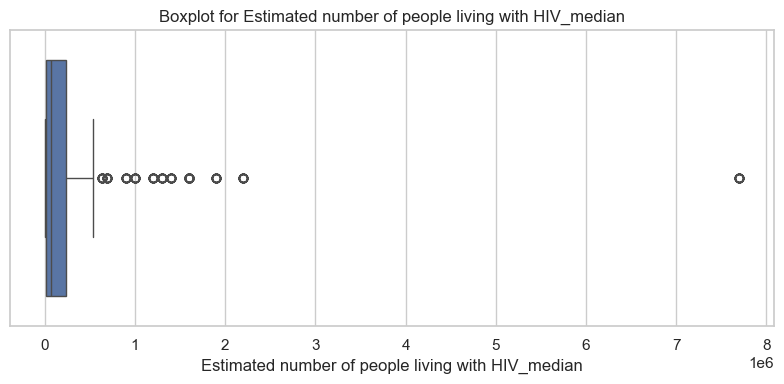

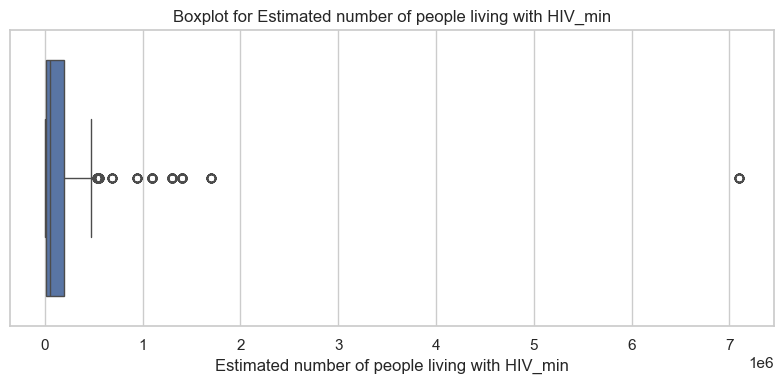

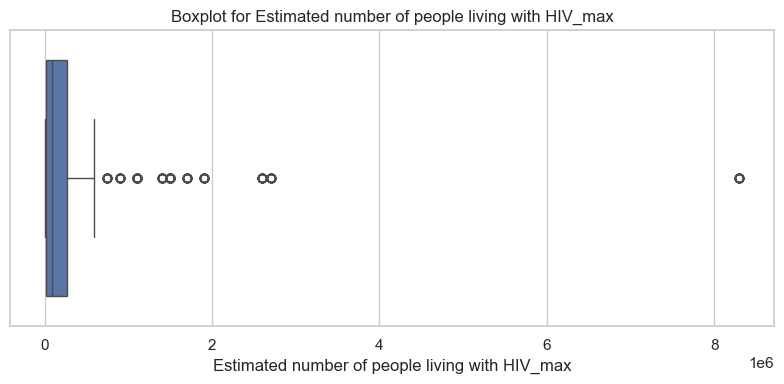

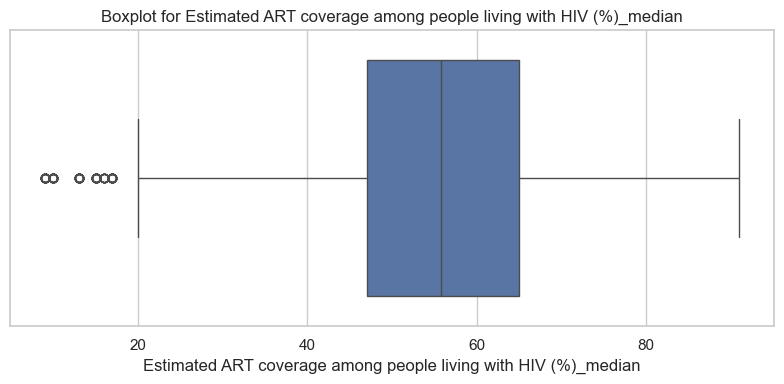

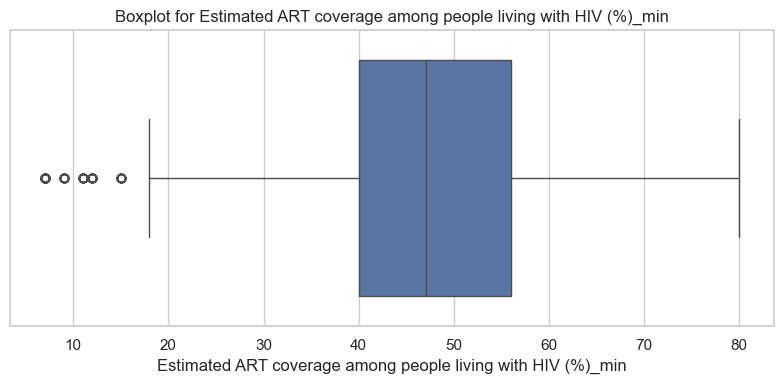

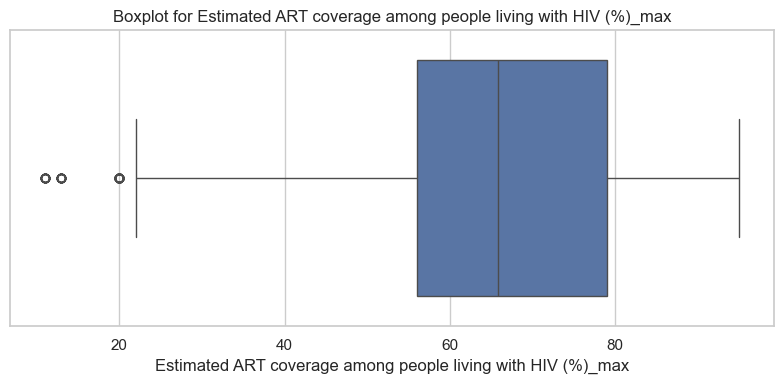

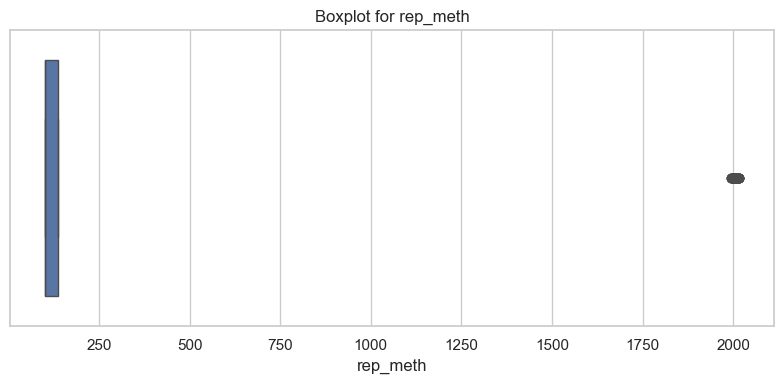

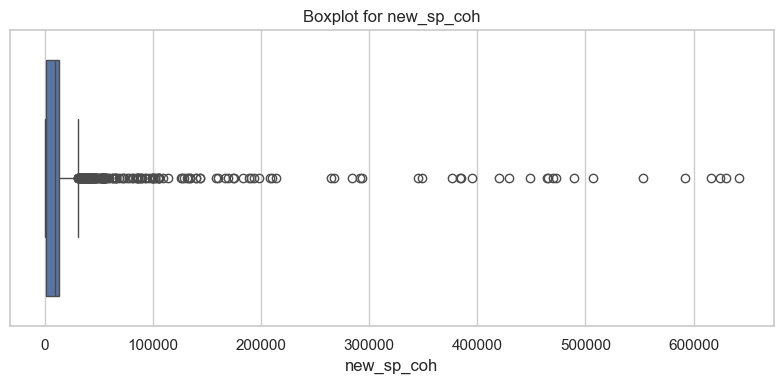

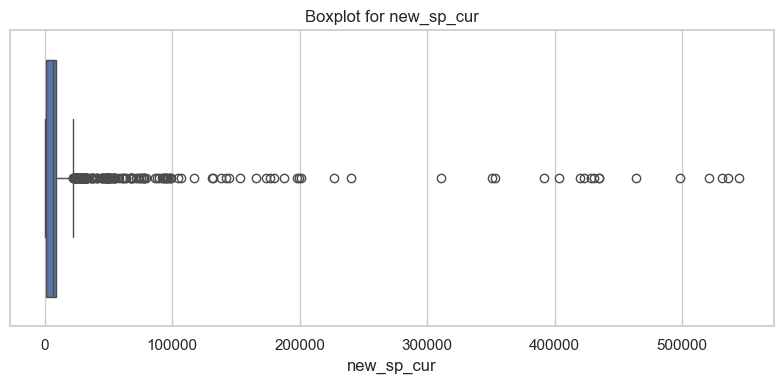

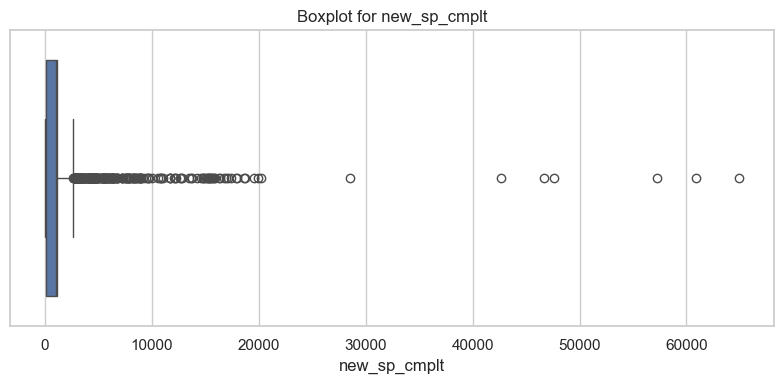

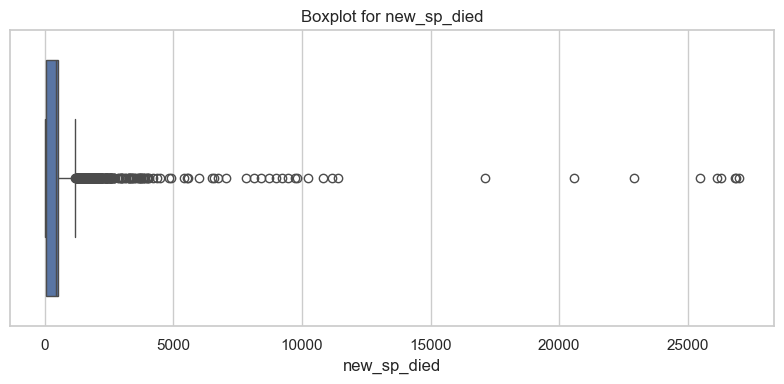

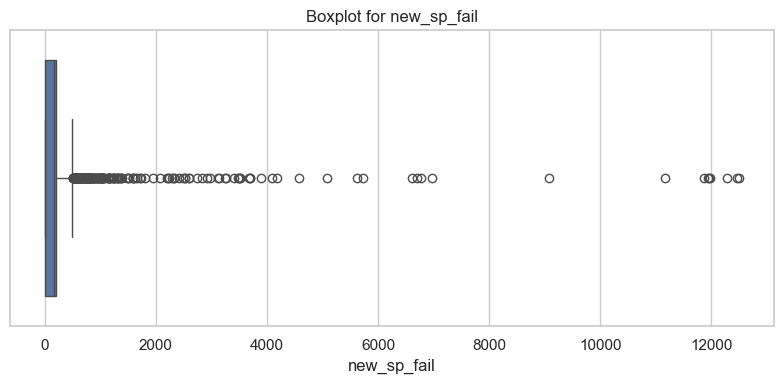

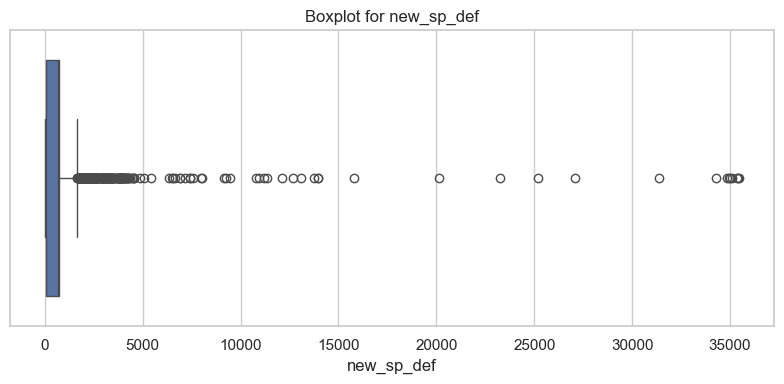

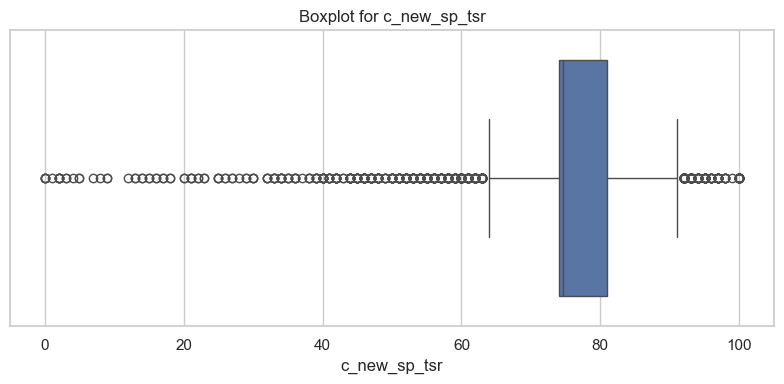

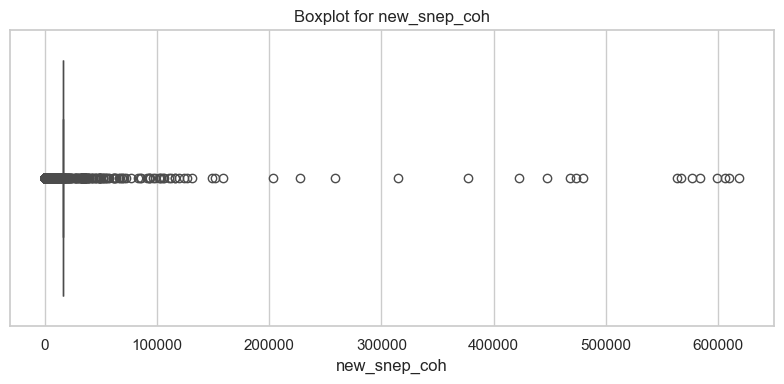

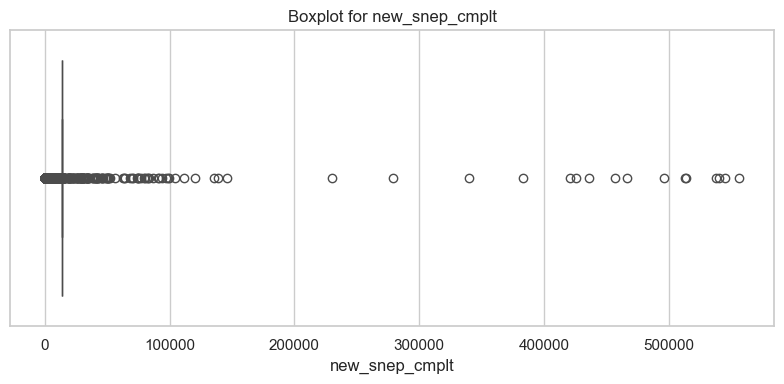

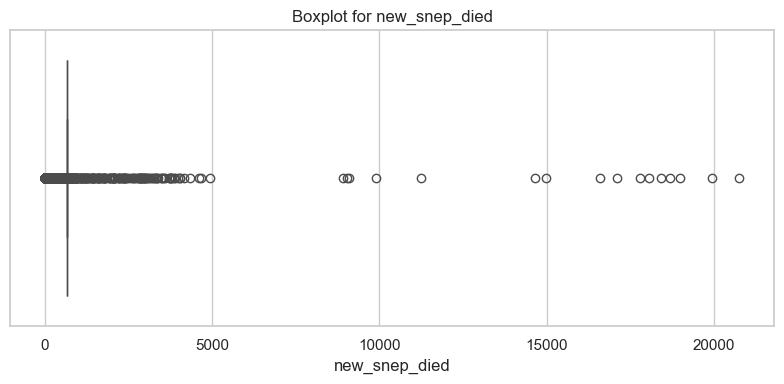

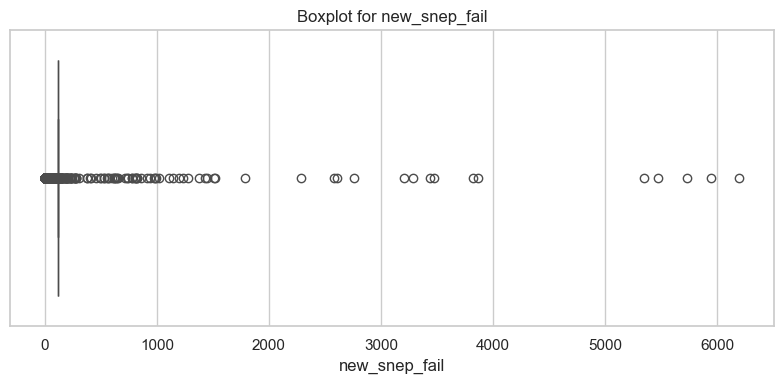

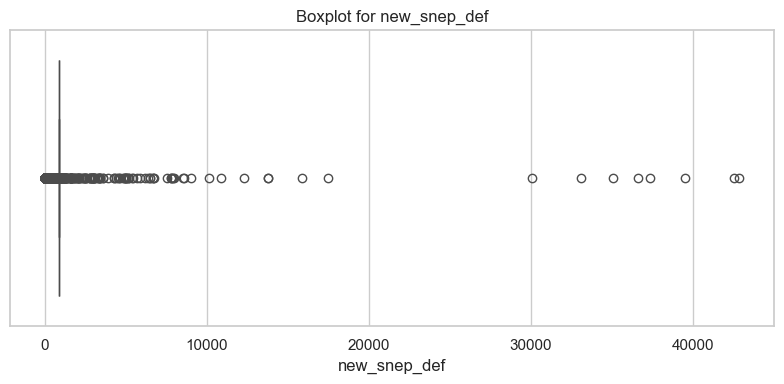

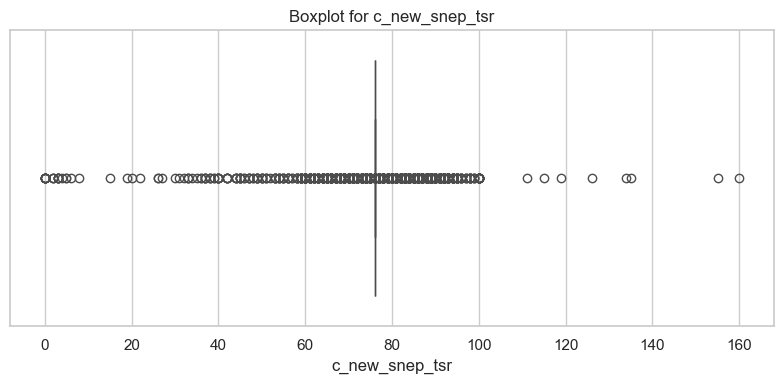

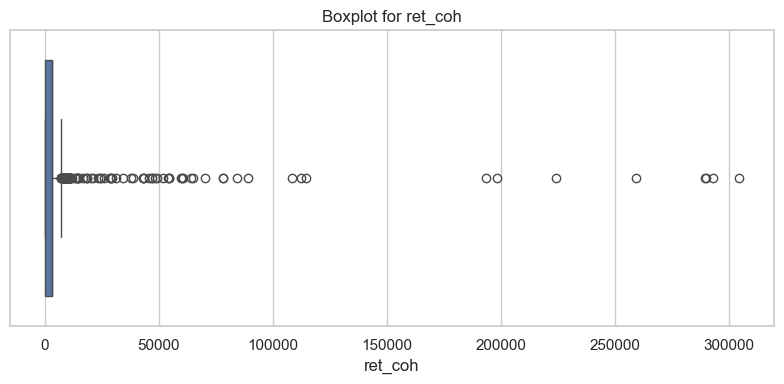

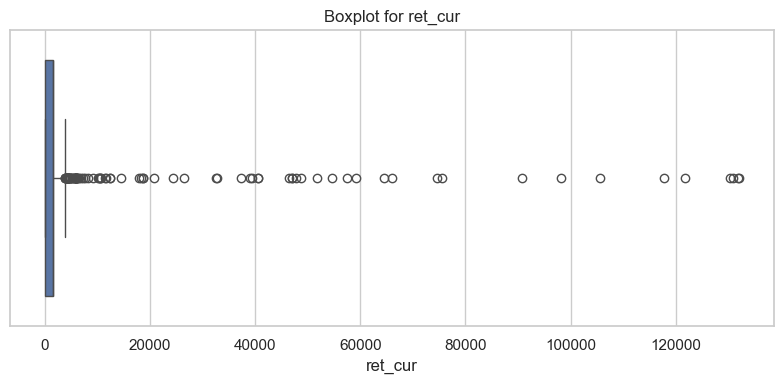

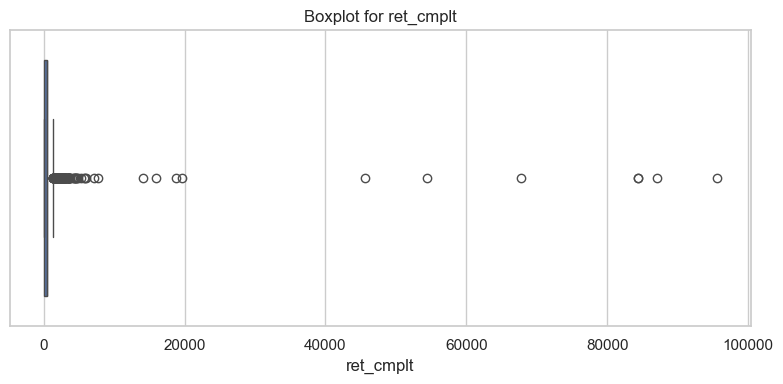

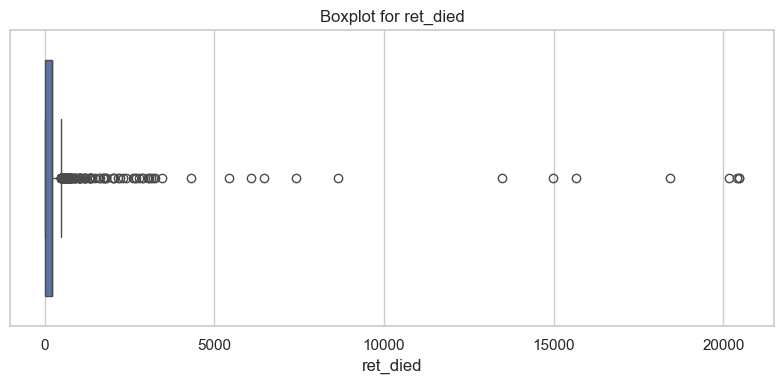

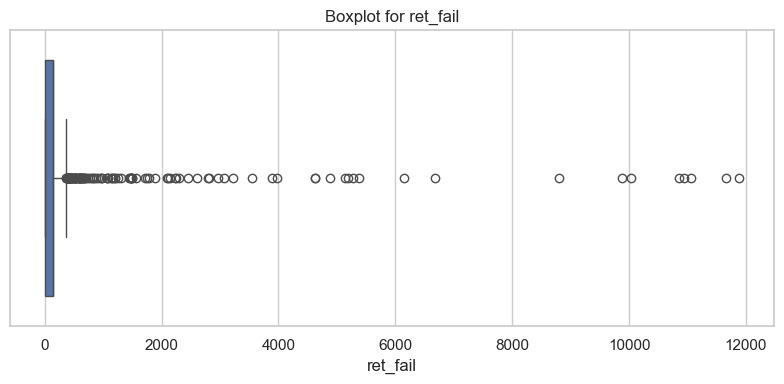

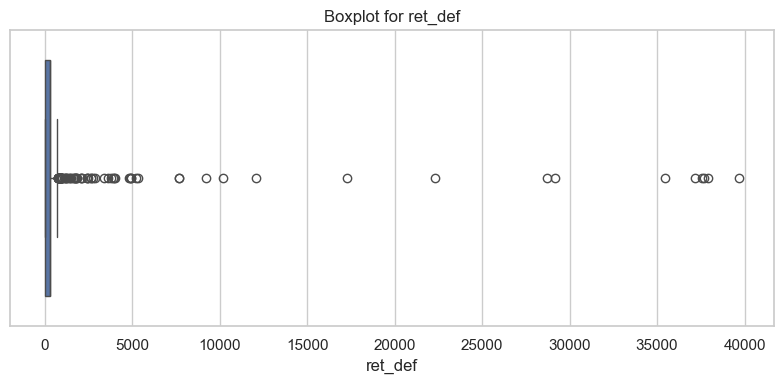

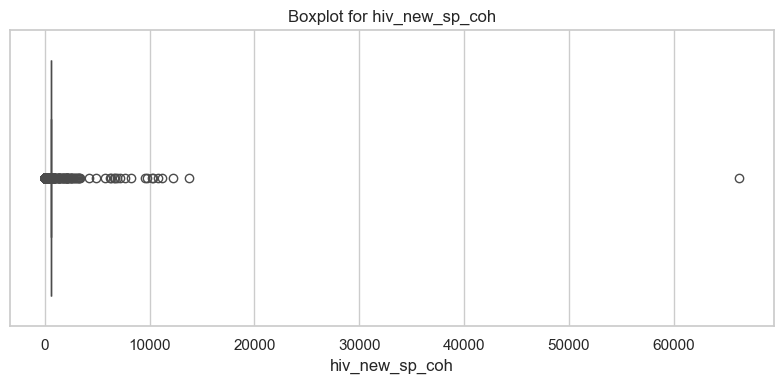

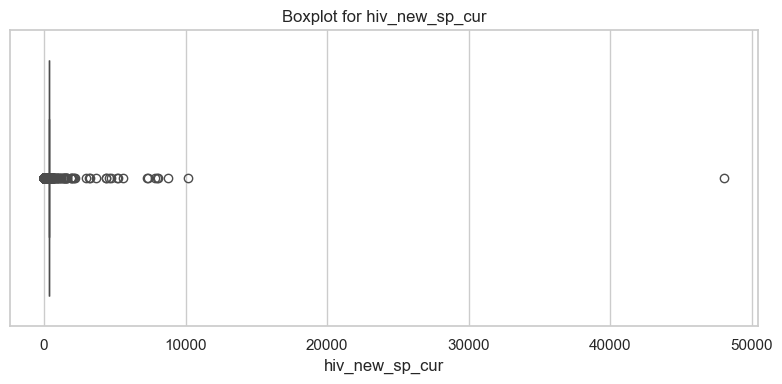

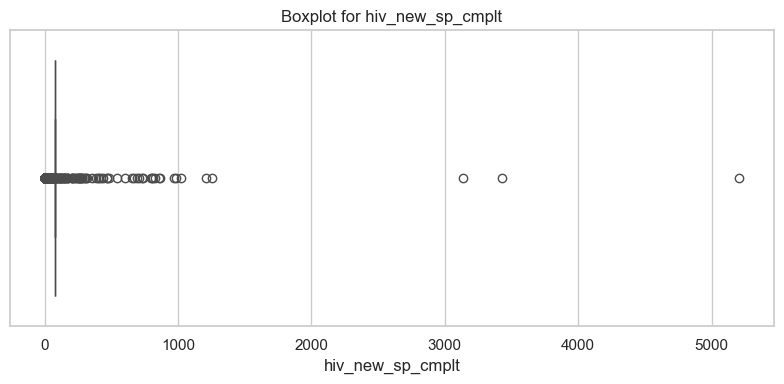

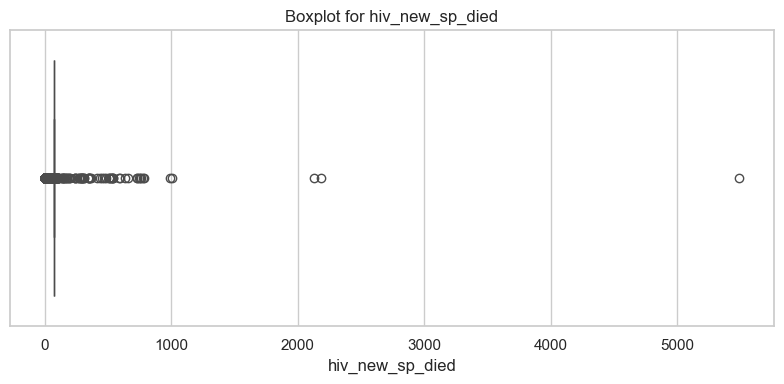

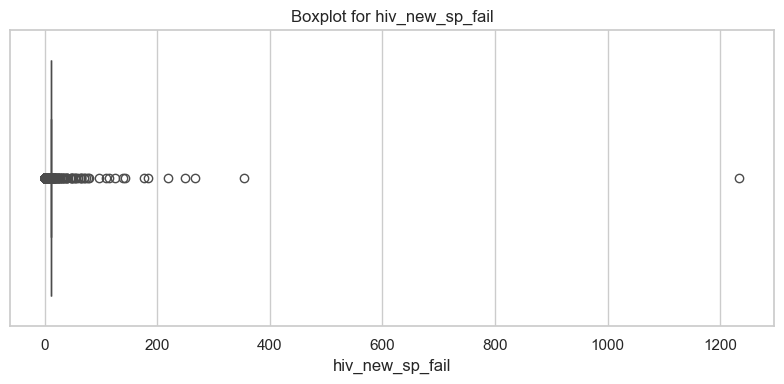

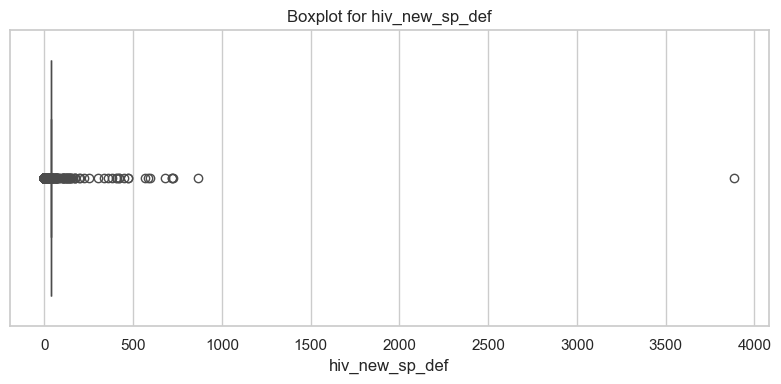

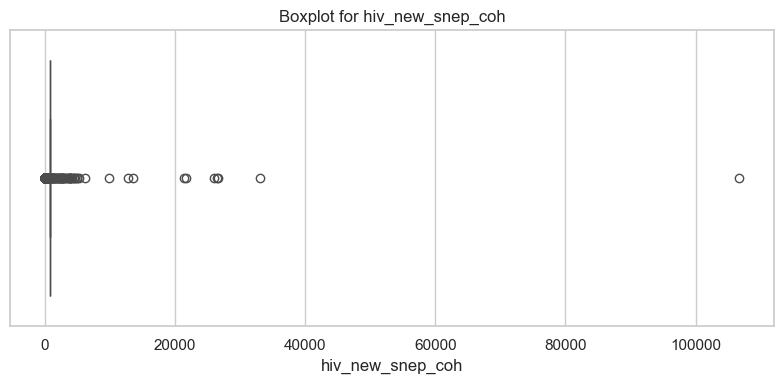

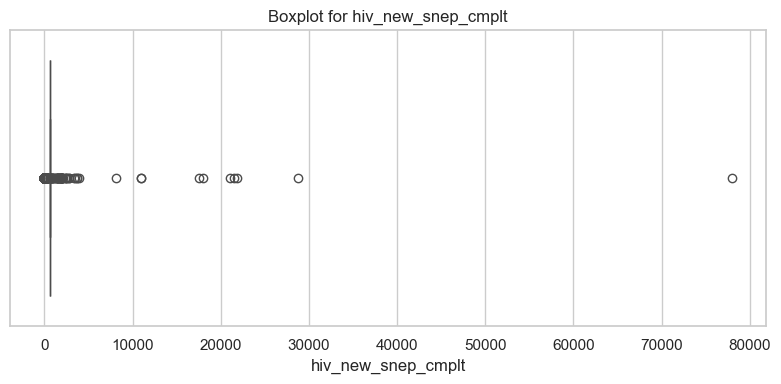

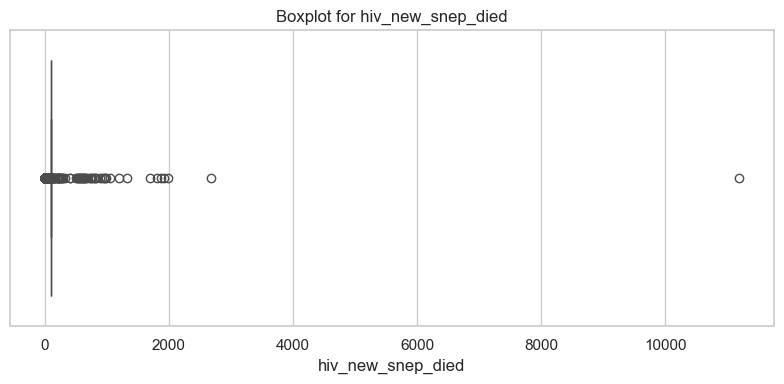

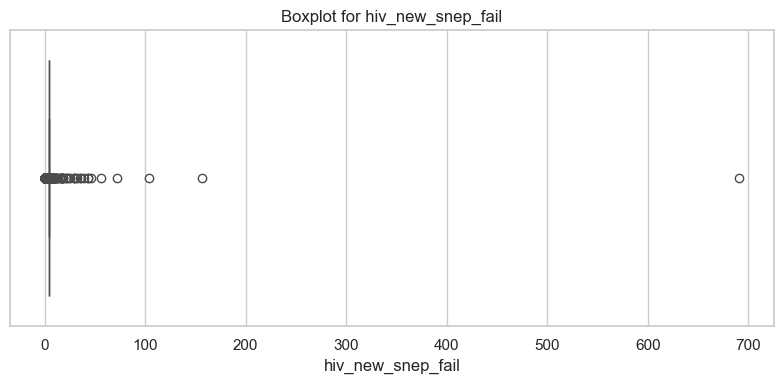

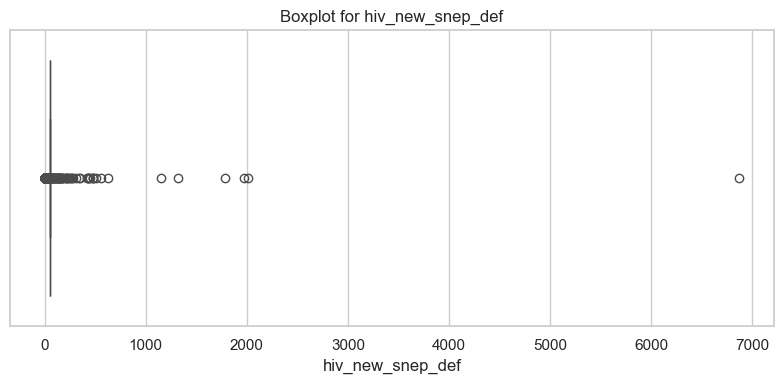

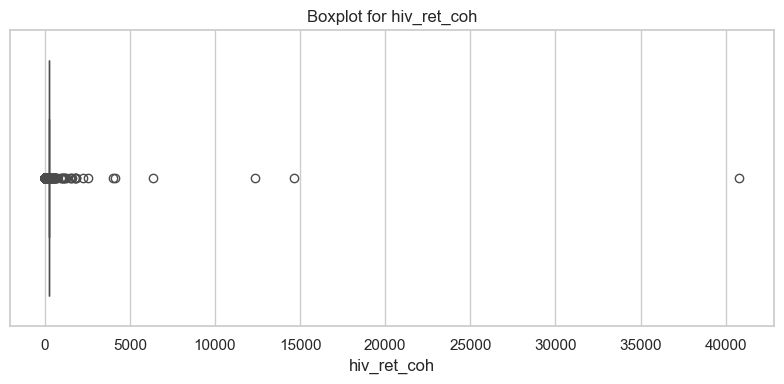

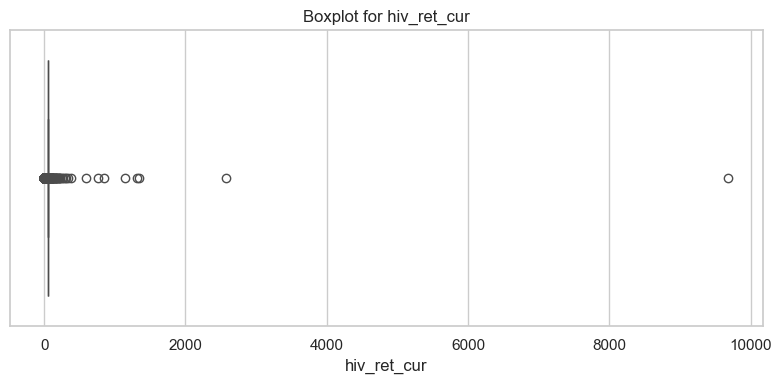

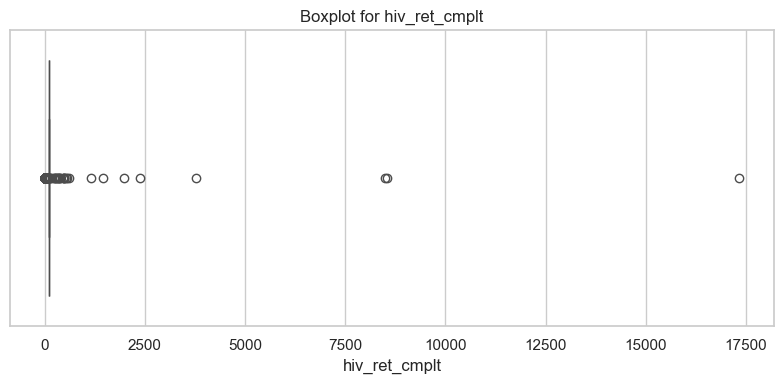

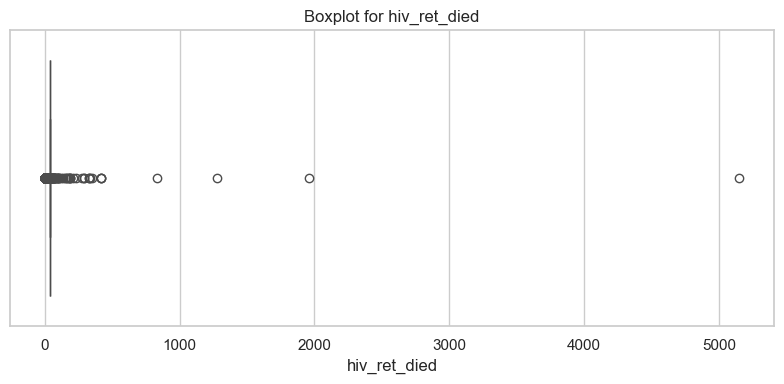

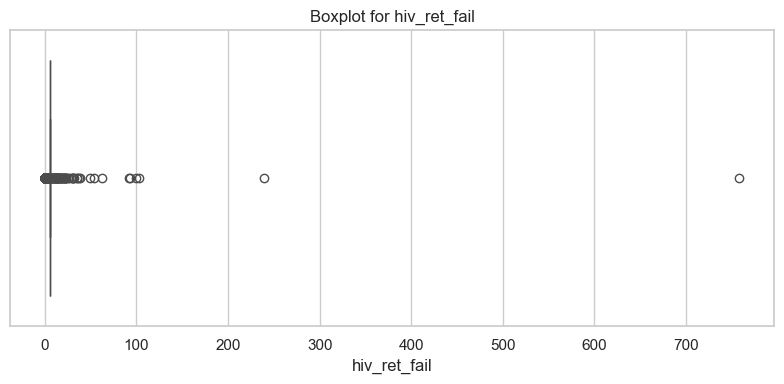

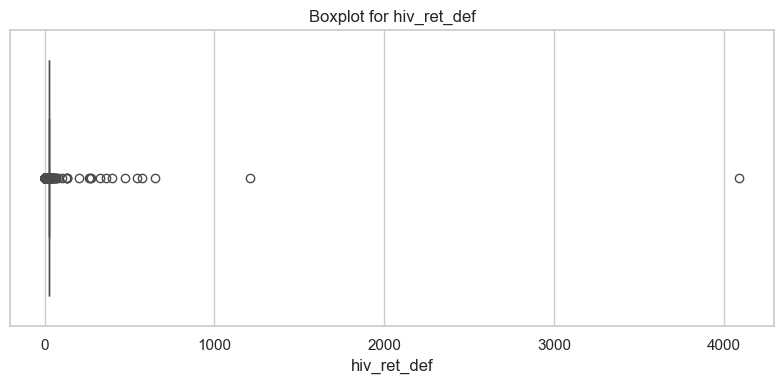

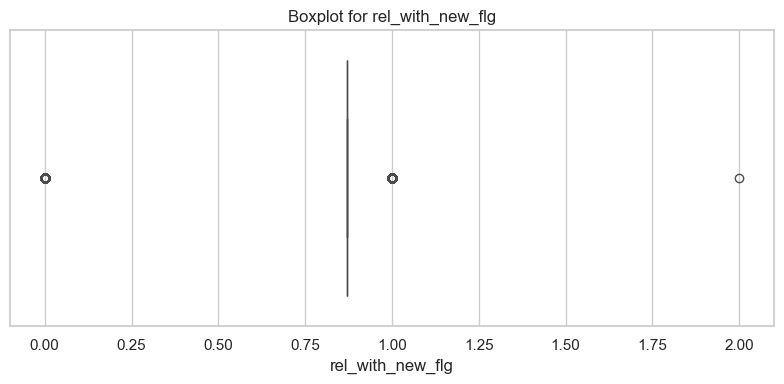

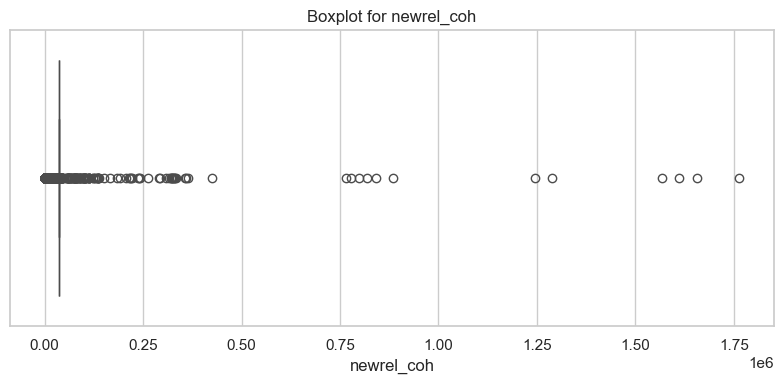

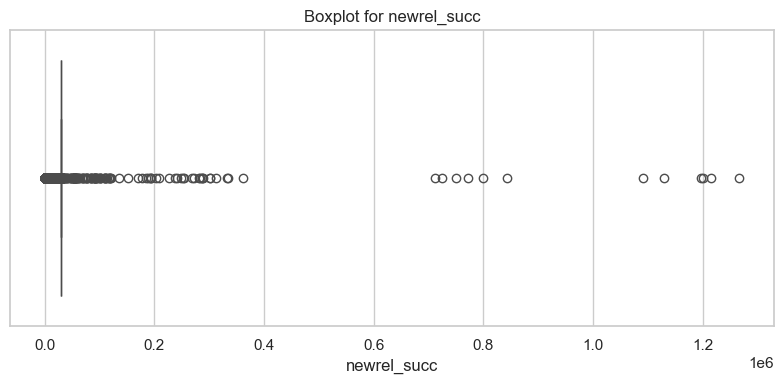

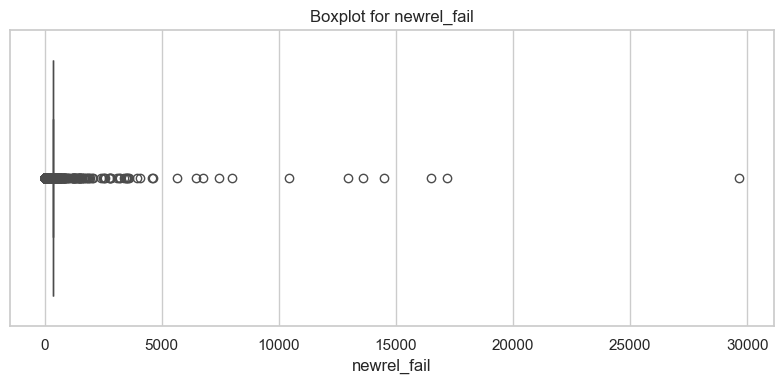

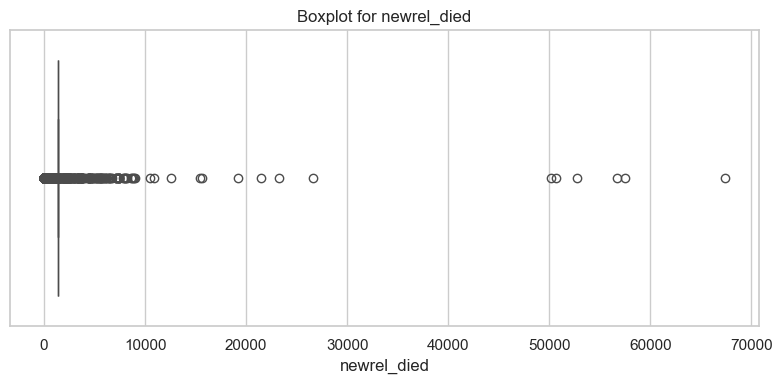

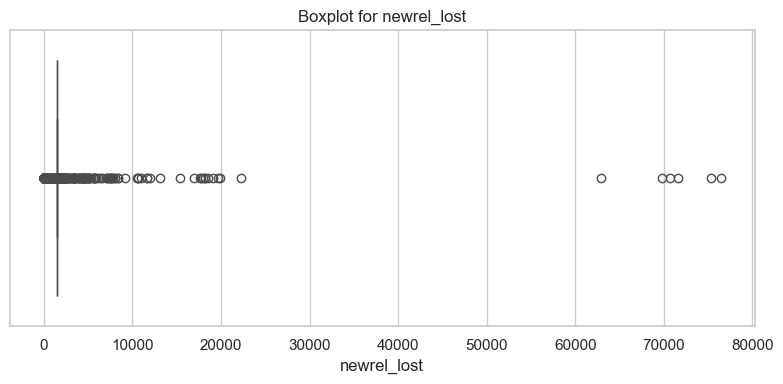

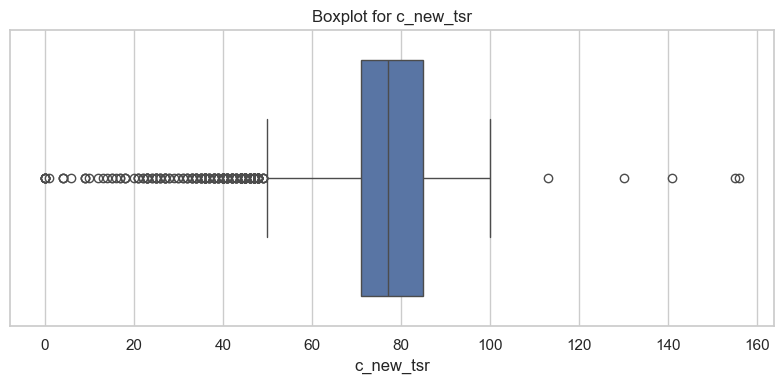

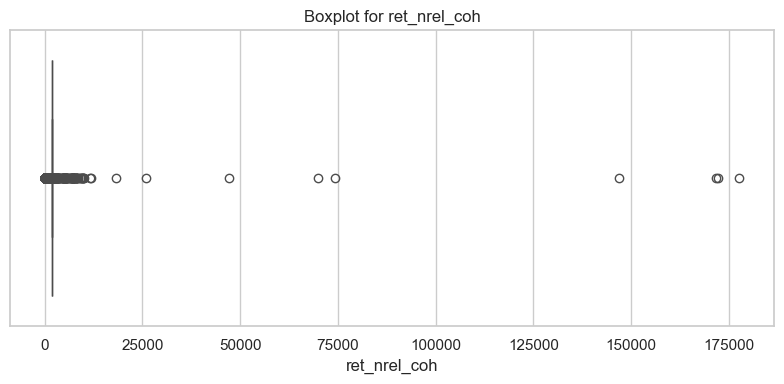

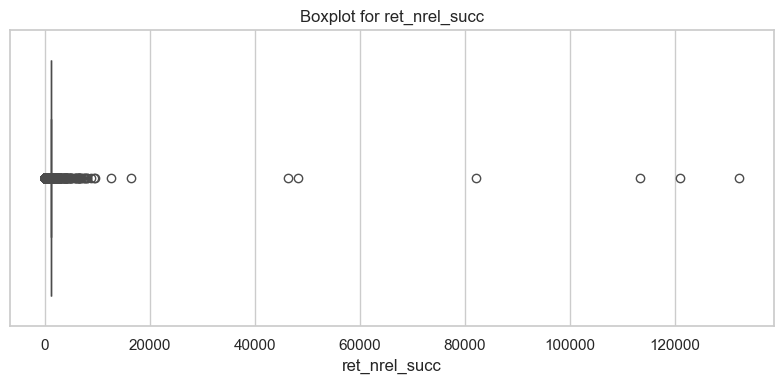

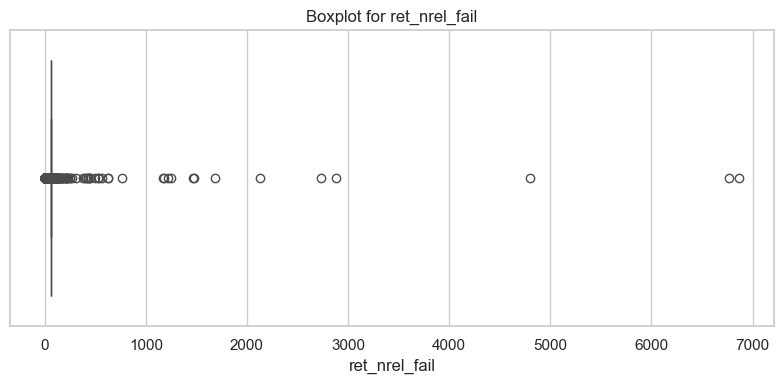

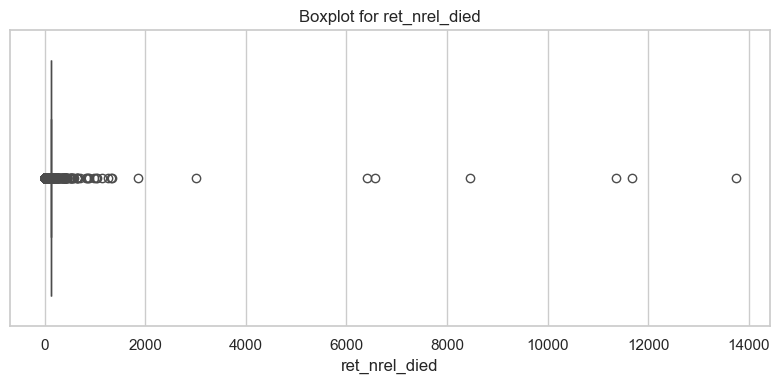

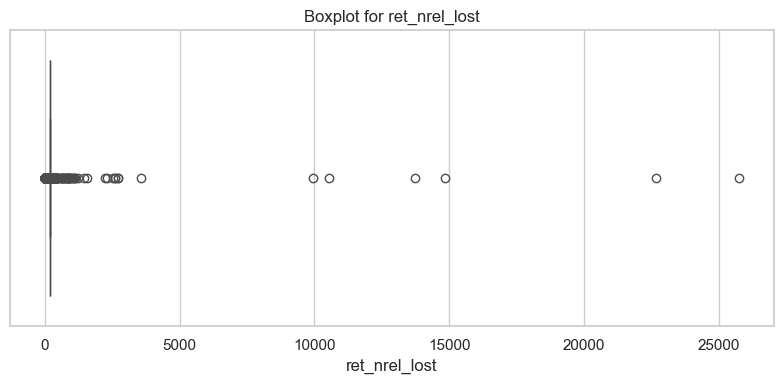

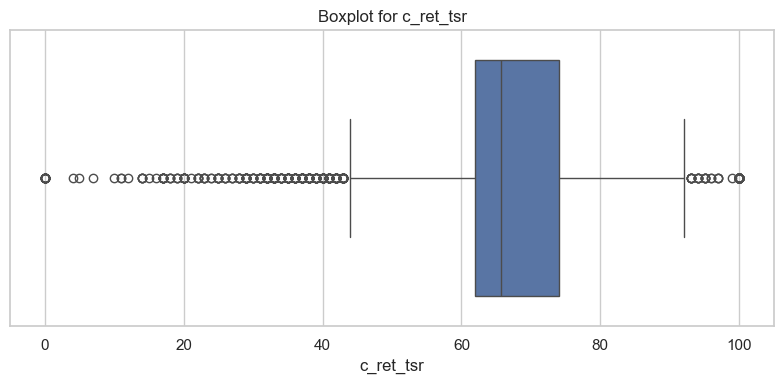

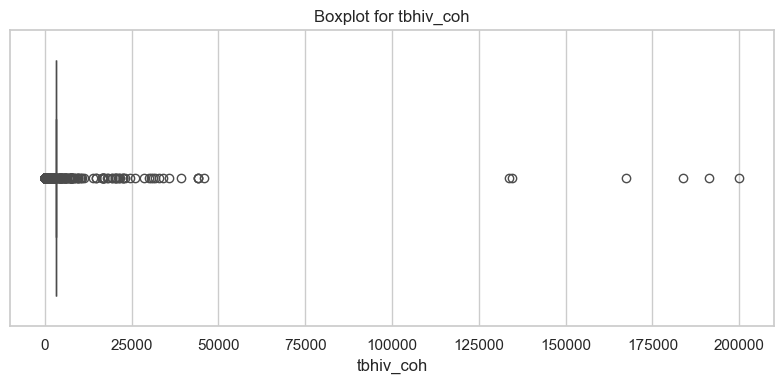

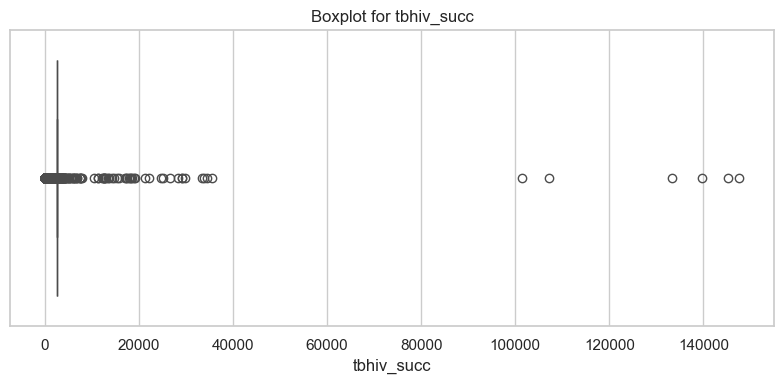

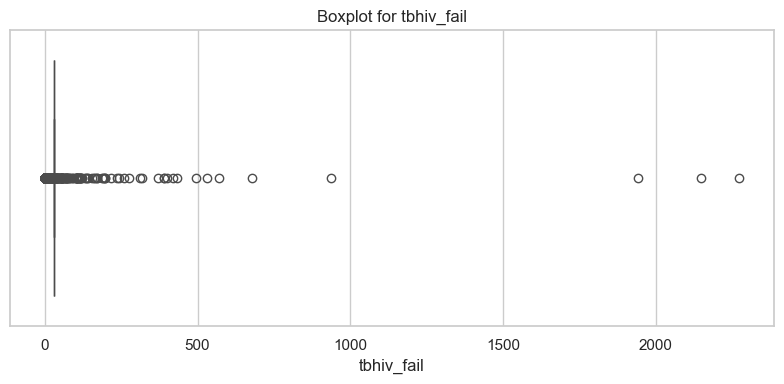

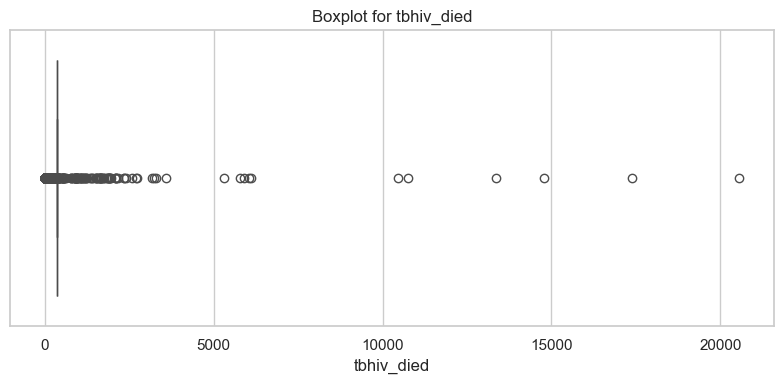

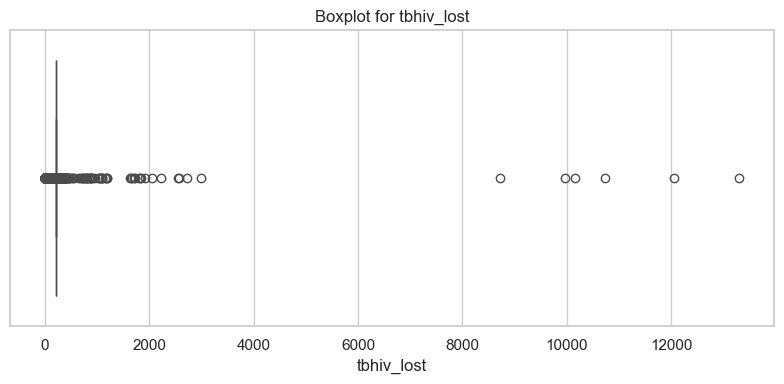

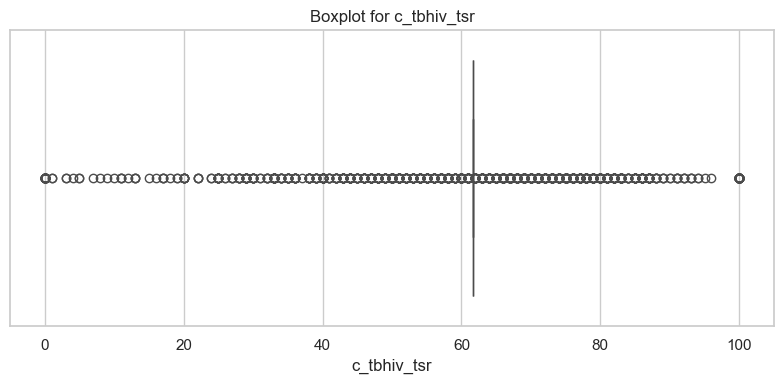

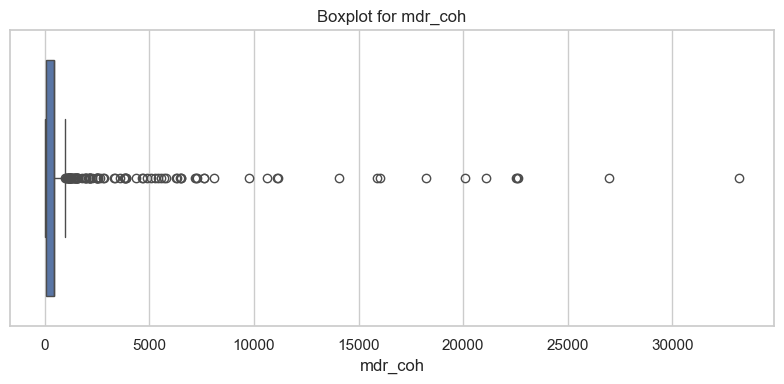

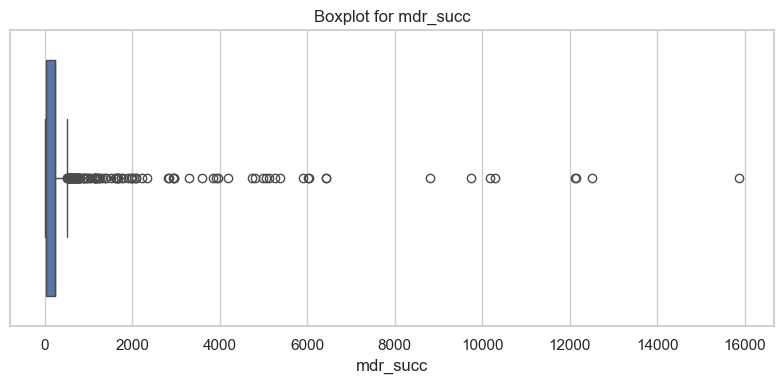

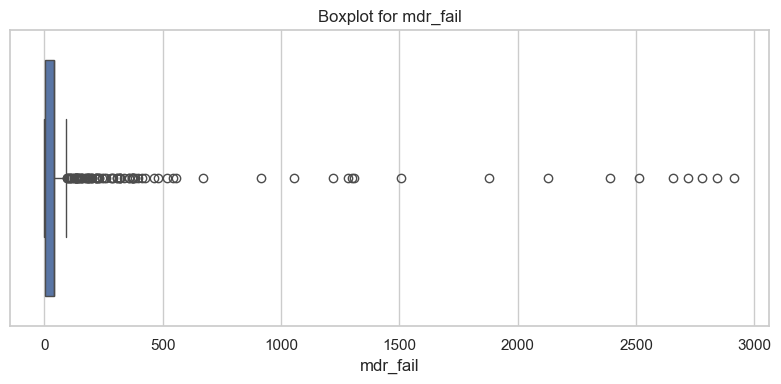

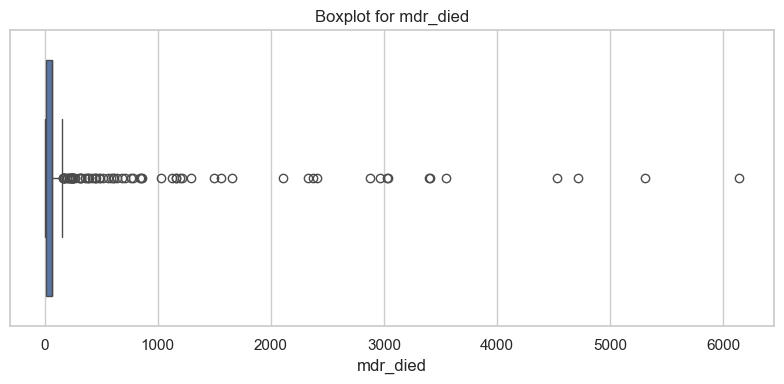

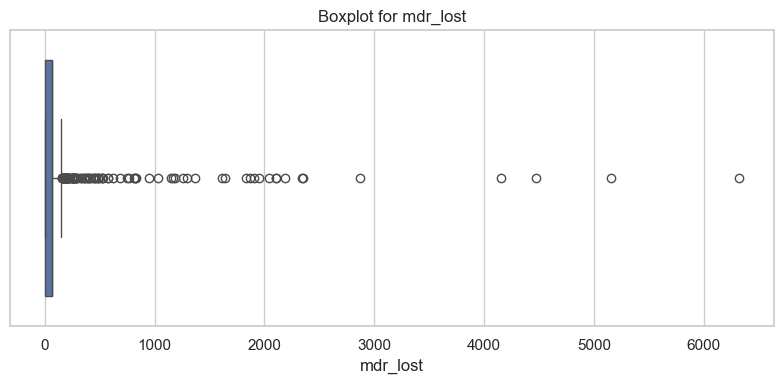

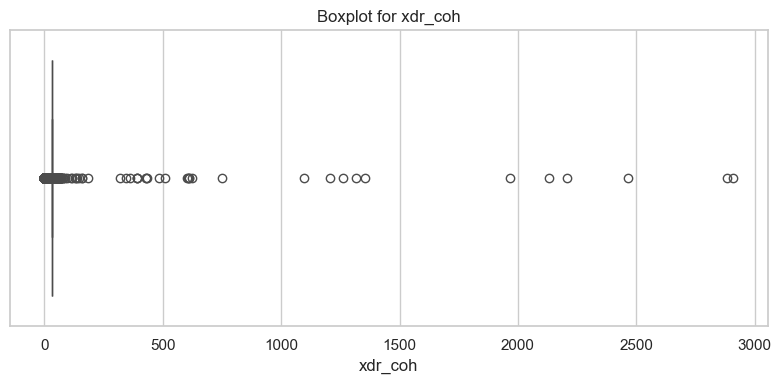

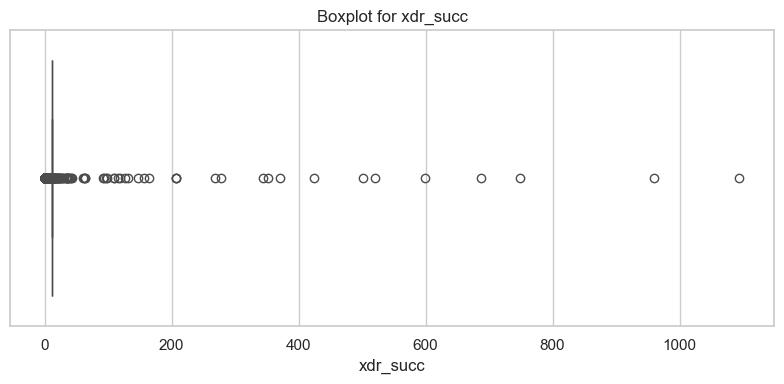

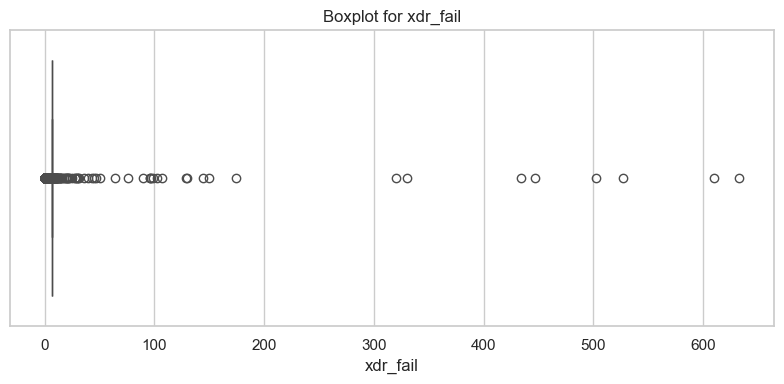

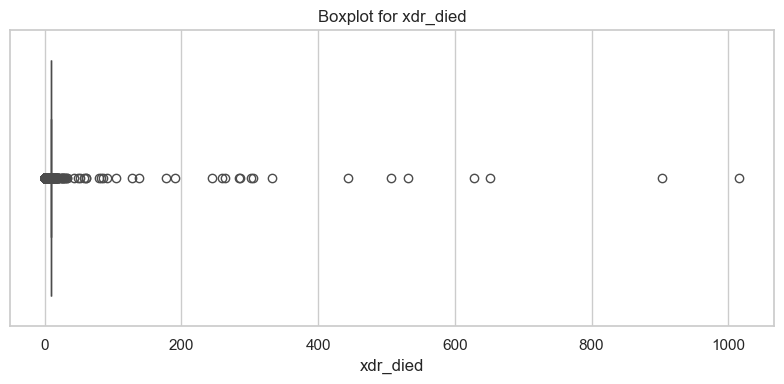

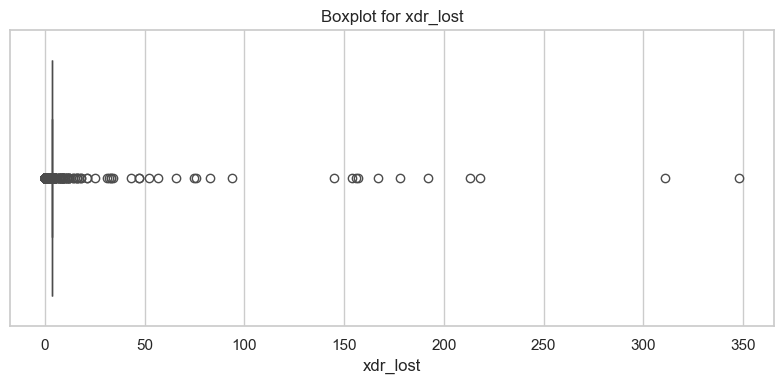

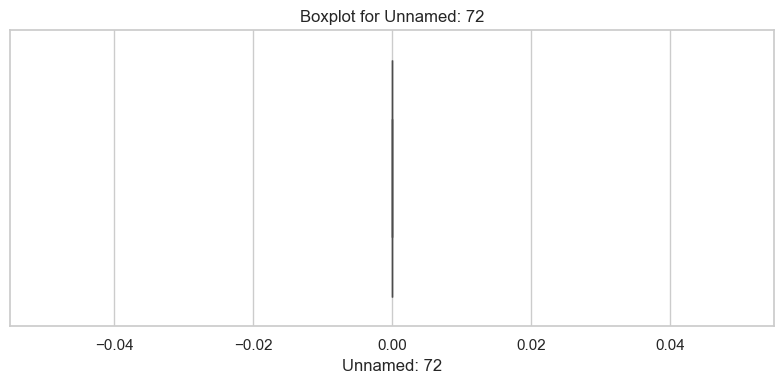

In [129]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

5.4 Handling Outliers with IQR Method

5.4.1 IQR Outlier Removal Function

In [130]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

5.4.2 Apply IQR Outlier Removal for all numeric columns

In [131]:
for col in numeric_cols:
    if col in df_cleaned.columns:
        before = df_cleaned.shape[0]
        df_cleaned = remove_outliers_iqr(df_cleaned, col)
        after = df_cleaned.shape[0]
        print(f"✅ '{col}': {before - after} rows removed as outliers.")

✅ 'Estimated number of people living with HIV_median': 288 rows removed as outliers.
✅ 'Estimated number of people living with HIV_min': 0 rows removed as outliers.
✅ 'Estimated number of people living with HIV_max': 0 rows removed as outliers.
✅ 'Estimated ART coverage among people living with HIV (%)_median': 128 rows removed as outliers.
✅ 'Estimated ART coverage among people living with HIV (%)_min': 120 rows removed as outliers.
✅ 'Estimated ART coverage among people living with HIV (%)_max': 72 rows removed as outliers.
✅ 'rep_meth': 48 rows removed as outliers.
✅ 'new_sp_coh': 98 rows removed as outliers.
✅ 'new_sp_cur': 7 rows removed as outliers.
✅ 'new_sp_cmplt': 54 rows removed as outliers.
✅ 'new_sp_died': 24 rows removed as outliers.
✅ 'new_sp_fail': 36 rows removed as outliers.
✅ 'new_sp_def': 9 rows removed as outliers.
✅ 'c_new_sp_tsr': 741 rows removed as outliers.
✅ 'new_snep_coh': 520 rows removed as outliers.
✅ 'new_snep_cmplt': 0 rows removed as outliers.
✅ 'new_sn

5.4.3 Checking for the Final Dataset Shape

In [132]:
print("🧹 Final cleaned dataset shape after outlier handling:", df_cleaned.shape)

🧹 Final cleaned dataset shape after outlier handling: (598, 83)


5.5 Feature and Target Selection

5.5.1 Defining My Target Column

In [133]:
target = 'Estimated ART coverage among people living with HIV (%)_median'

5.5.2 Dropping Non-numeric or irrelevant columns

In [134]:
X = df_cleaned.drop(columns=['Country', 
                             'Estimated number of people living with HIV',
                             'Estimated ART coverage among people living with HIV (%)',
                             target])
y = df_cleaned[target]

5.5.3 Checking for 'Nodata' values in all columns

In [135]:
X.applymap(lambda x: isinstance(x, str) and 'Nodata' in x).sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3100\1208097120.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(lambda x: isinstance(x, str) and 'Nodata' in x).sum()


Reported number of people receiving ART                        129
Estimated number of people living with HIV_median                0
Estimated number of people living with HIV_min                   0
Estimated number of people living with HIV_max                   0
Estimated ART coverage among people living with HIV (%)_min      0
                                                              ... 
xdr_succ                                                         0
xdr_fail                                                         0
xdr_died                                                         0
xdr_lost                                                         0
Unnamed: 72                                                      0
Length: 79, dtype: int64

5.5.4 Replacing 'Nodata' with np.nan in the specific column

In [136]:
X['Reported number of people receiving ART'] = X['Reported number of people receiving ART'].replace("Nodata", np.nan)

5.5.5 Converting to numeric

In [137]:
X['Reported number of people receiving ART'] = pd.to_numeric(X['Reported number of people receiving ART'], errors='coerce')

5.5.6 Filling missing with mean (or median, or drop — your call)

In [138]:
X.loc[:, 'Reported number of people receiving ART'] = X['Reported number of people receiving ART'].fillna(X['Reported number of people receiving ART'].mean())

5.5.7 Checking for Data Types

In [139]:
print(X.dtypes)

Reported number of people receiving ART                        float64
Estimated number of people living with HIV_median              float64
Estimated number of people living with HIV_min                 float64
Estimated number of people living with HIV_max                 float64
Estimated ART coverage among people living with HIV (%)_min    float64
                                                                ...   
xdr_succ                                                       float64
xdr_fail                                                       float64
xdr_died                                                       float64
xdr_lost                                                       float64
Unnamed: 72                                                    float64
Length: 79, dtype: object


5.5.8 Removing all non-numeric columns from X

In [140]:
X_numeric = X.select_dtypes(include='number')

6. EXPLORATORY DATA ANALYSIS (EDA)

6.1 Plotting Correlation Heatmap

c:\Users\DELL\OneDrive\Desktop\tb_prediction_project\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


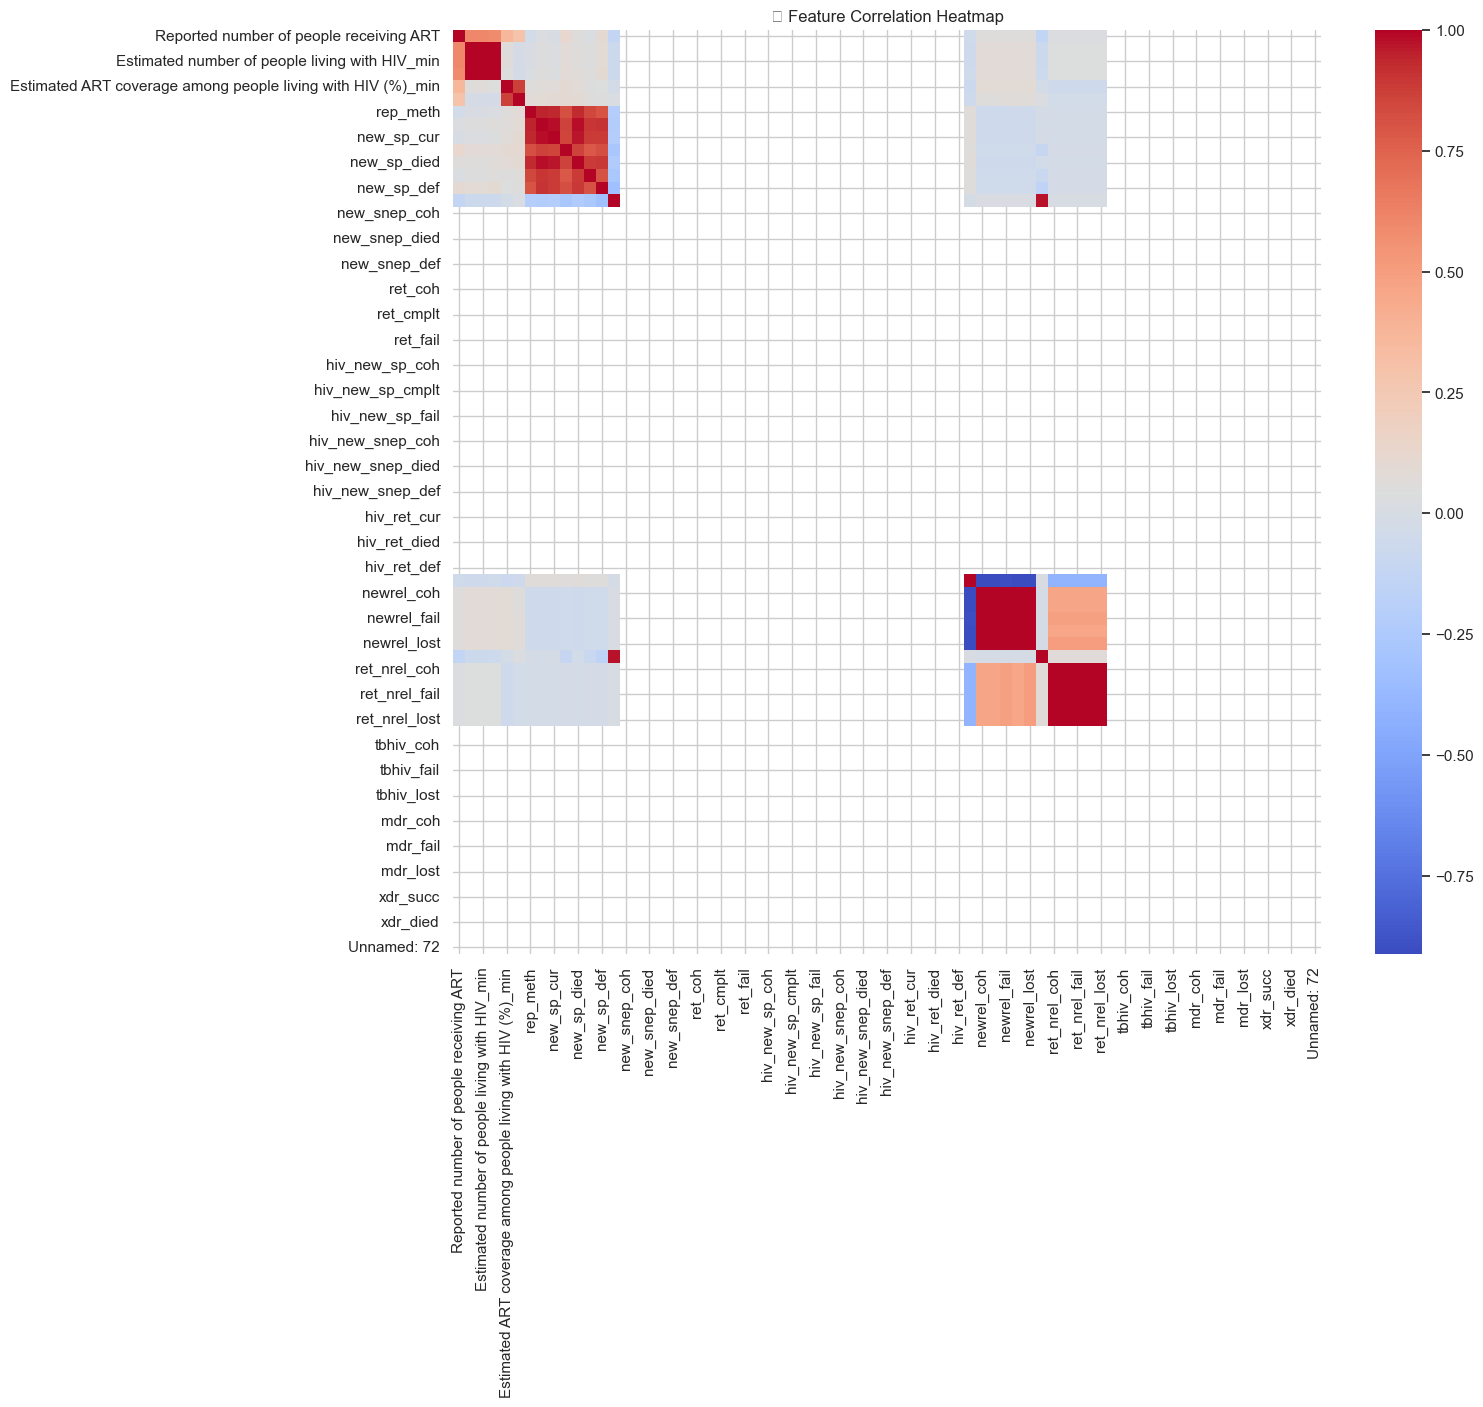

In [141]:
plt.figure(figsize=(14, 12))
sns.heatmap(X_numeric.corr(), cmap='coolwarm', annot=False)
plt.title("📊 Feature Correlation Heatmap")
plt.show()

6.2 Distribution of Target Variable

c:\Users\DELL\OneDrive\Desktop\tb_prediction_project\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


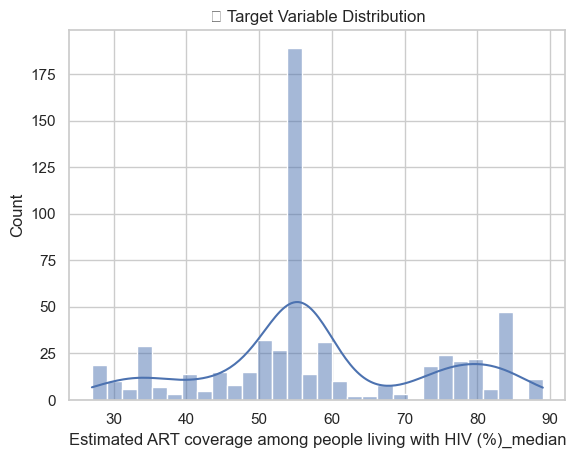

In [142]:
sns.histplot(y, bins=30, kde=True)
plt.title("📈 Target Variable Distribution")
plt.xlabel(target)
plt.show()

7. TRAINING, EVALUATING, & SAVING THE MODEL

7.1 Identifying Non-numeric columns

In [145]:
non_numeric = X.select_dtypes(include=['object']).columns
print("🧾 Non-numeric columns:\n", non_numeric)

🧾 Non-numeric columns:
 Index(['WHO Region', 'iso2', 'iso3', 'iso_numeric', 'g_whoregion', 'year'], dtype='object')


7.2 Encoding Non-numeric columns to Numeric 

In [146]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in ['WHO Region', 'iso2', 'iso3', 'iso_numeric', 'g_whoregion', 'year']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le  

7.3 Splitting Dataset into Training and Testing Sets

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7.4 Fitting and Training the Model

In [148]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

7.5 Predictions

In [149]:
y_pred = model.predict(X_test)

7.6 Evaluation

In [152]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"🔍 R² Score: {r2:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📊 Mean Squared Error (MSE): {mse:.4f}")
print(f"📈 Root Mean Squared Error (RMSE): {rmse:.4f}")

🔍 R² Score: 0.9966
📉 Mean Absolute Error (MAE): 0.2951
📊 Mean Squared Error (MSE): 0.8251
📈 Root Mean Squared Error (RMSE): 0.9083


7.7 Saving the Model

In [153]:
joblib.dump(model, "random_forest_Regression_model.pkl")

['random_forest_Regression_model.pkl']